## Analyzing the World Happiness Data


### Grouping subsets of data by cuts

In this exercise, we will continue to examine how to group subsets of data using the split-apply-combine methodology, this time by making various cuts of the data.

As before, we'll repeat here some of the code developed in previous exercises so that we can continue to work with data in this exercise. Execute the next few code cells to load and reconfigure the data. In addition to the full dataset, we will also want to examine the data just from 2015-2017, which we will store in a dataframe named `df1517`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [3]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)

### Step 1

The `groupby` method on a dataframe puts entries into groups that share a common label.  In the previous exercise, we were able to group the WHR data by "country" or "year" to get statistics aggregated over those variables.  Sometimes, however, we have continuous floating point data that we want to group together into discrete bins.  Fortunately, pandas provides mechanisms for converting continuous data into categorical bins.

In the video, we considered the example shown in the code cell below (execute the cell and examine the output):

In [4]:
df.groupby(pd.cut(df.Happiness, bins=list(range(0,11)))).mean()

,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
Happiness,,,,,,,,,,
"(0, 1]",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(1, 2]",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"(2, 3]",2013.85,2.83,0.54,0.41,7.17,0.51,50.56,0.55,-0.01,0.83
"(3, 4]",2011.99,3.69,0.64,0.28,7.74,0.67,51.96,0.64,0.00,0.79
"(4, 5]",2011.61,4.55,0.66,0.28,8.37,0.75,56.95,0.67,-0.01,0.81
"(5, 6]",2011.87,5.48,0.69,0.26,9.39,0.83,63.82,0.71,-0.05,0.81
"(6, 7]",2012.09,6.46,0.78,0.25,10.15,0.89,67.90,0.79,0.00,0.73
"(7, 8]",2011.51,7.34,0.81,0.22,10.57,0.93,70.52,0.89,0.15,0.49
"(8, 9]",2005.00,8.02,0.86,0.15,10.70,0.97,68.11,0.97,nan,0.24


### Step 2

Note the index of the dataframe in the output above.  These represent Happiness bins: from 0 to 1, 1 to 2, etc., on up to 9 to 10.  These bins, or intervals, are regions defined by two endpoints: a lower value and an upper value.  But the notation used above to describe these intervals is a little funny, with a parenthesis at the left (lower) end and a square bracket at the right (upper) end.  This notation is used to indicate whether the endpoint itself is *included* in the interval: a parenthesis indicates an open interval boundary that does not include the endpoint, whereas a square bracket indicates a closed boundary that does include the endpoint.  For example, the interval labeled as `(2, 3]` refers to an interval where Happiness is *greater than* 2 and *less than or equal to* 3.  The reason for constructing asymmetric intervals like this is so that every number is contained within one and only one bin: if we instead had intervals such as ```[2,3]``` and ```[3,4]```, then the number ```3``` would belong to both of those bins.

To understand what is going on here, it is useful to tease apart the expression above.  The inner part of the code above involves a call to `pd.cut`.  The `pd.cut` function is documented [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).  Execute the code cell below and examine the output.

In [5]:
pd.cut(df.Happiness, bins=list(range(0,11)))

0       (3, 4]
1       (4, 5]
2       (4, 5]
3       (3, 4]
4       (3, 4]
         ...  
1557    (4, 5]
1558    (4, 5]
1559    (3, 4]
1560    (3, 4]
1561    (3, 4]
Name: Happiness, Length: 1562, dtype: category
Categories (10, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

The ```pd.cut``` function puts data into bins based on the values of the data and the location of the bin edges.  There are different ways of specifying how you want the bins constructed.  One way is to pass an integer, such as 4, and ```pd.cut``` creates that number of equal-size bins that can contain all the data from the minimum to maximum values.

Alternatively, you can specify bins by providing a list of bin edges rather than having pandas calculate them from the data.  That is what we have done here when we have specified ```bins=list(range(0,11))```: we have said we want the bin edges to be given by the numbers in the list ```[0,1,2,3,4,5,6,7,8,9,10]```.  The ```pd.cut``` function has another option ```right``` with a default value of ```True```: this indicates whether the bins include the rightmost edge or not.  Since ```right=True``` by default, we have specified that we want the bins to start at ```0``` and end at ```10```, so that we get the following set of bins:

```
[(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]
```
We can see that the result of this call to `pd.cut` is a Series where each row of the `df.Happiness` data is mapped to a particular bin within this collection of 10 bins starting at ```0``` and ending at ```10```.

In other words, the continuous floating point data in `df.Happiness` have been discretized into a set of categories.  And now that we have a set of discrete categories, we can group on those as we would with any other label.


### Step 3

Let's try binning on something other than the Happiness column, say, the LogGDP data instead.  In this case, instead of providing a specific list of bin edges, let's just specify the total number of bins we want and let pandas construct the bins based on the data.

In the code cell below, group the WHR data into 10 bins in LogGDP, and compute the total number of entries in each bin by applying the `size` method.  Assign the result to the variable `LogGDP_bins`.  Examine the result.  You should notice that the bin edges are not integers as in the previous example, since pandas has decided to subdivide the full interval ranging from 6.372 to 11.77 into 10 equal-size bins.

## Graded Cell

This cell is worth 50% of the grade for this assignment.

In [6]:
LogGDP_bins = df.groupby(pd.cut(df.LogGDP, bins=10)).size()
LogGDP_bins

LogGDP
(6.372, 6.917]       42
(6.917, 7.456]      100
(7.456, 7.995]      155
(7.995, 8.535]      159
(8.535, 9.074]      178
(9.074, 9.613]      245
(9.613, 10.152]     257
(10.152, 10.692]    257
(10.692, 11.231]    118
(11.231, 11.77]      24
dtype: int64

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [7]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testBins

try:
    print(testBins(LogGDP_bins))
except Exception as e:
    print("Error!\n" + str(e))


Correct!


If you want, you can see what the distribution of LogGDP values produced by this cut looks like by plotting ```LogGDP_bins```.  Execute the code cell below.

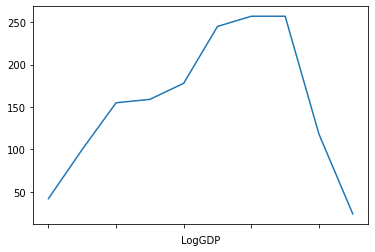

In [8]:
LogGDP_bins.plot(rot=90)

### Step 4

In addition to `pd.cut`, which cuts the data into prescribed bins, there is also `pd.qcut`, which cuts data into prescribed quantiles, such that each quantile contains (approximately) the same number of entries.  We specify how many bins we want to cut the data into, and pandas decides where the bin edges need to be located to divide into bins with the same number of entries.  If we wanted to cut into 4 bins, we could pass the parameter `q=4` to `pd.qcut`: this would group the values into bins for the ranges 0%-25%, 25%-50%, 50%-75%, and 75%-100%.  The term "quantile" is general, and the specific division depends on the value of ```q```.  But for a few particular values of ```q```, special names are typically used in the statistics community: for example, ```q=4``` produces "quartiles", ```q=5``` produces "quintiles", and ```q=10``` produces "deciles".

In the code cell below, group the WHR data into quartiles in LogGDP, and compute the total number of entries in each bin by applying the `size` method.  Assign the result to the variable `LogGDP_quartiles`.  Examine the result.  Note that the number of entries in each bin are approximately equal (as desired), and that the values defining each bin are now chosen to accomplish the split into 4 bins with the same number of elements.  The bins will contain exactly the same number of entries only if the total size of the dataset is evenly divisible by ```q``` (without remainder).  If the dataset is not evenly divisible, then the number of entries in bins can differ by 1.

## Graded Cell

This cell is worth 50% of the grade for this assignment.

In [9]:
LogGDP_quartiles = df.groupby(pd.qcut(df.LogGDP, q=4)).size()

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [10]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testQuartiles

try:
    print(testQuartiles(LogGDP_quartiles))
except Exception as e:
    print("Error!\n" + str(e))


Correct!
